<a href="https://colab.research.google.com/github/rich-hyun/6th-statistic-competition/blob/main/Statistic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#국민연금 계산(9/26)

  연도     연금수입(억원)     연금지출(억원)      기금잔액(억원)
2025 6.090339e+05 4.789816e+05  1.262242e+07
2026 6.592100e+05 5.390036e+05  1.312130e+07
2027 7.114814e+05 5.847000e+05  1.364172e+07
2028 7.659096e+05 6.335611e+05  1.418332e+07
2029 8.225575e+05 6.857746e+05  1.474560e+07
2030 8.814884e+05 7.415379e+05  1.532792e+07
2031 9.382124e+05 7.971892e+05  1.592878e+07
2032 9.967571e+05 8.562240e+05  1.654718e+07
2033 1.057157e+06 9.188166e+05  1.718193e+07
2034 1.077986e+06 9.851494e+05  1.779023e+07
2035 1.099113e+06 1.055413e+06  1.836764e+07
2036 1.120537e+06 1.129807e+06  1.890939e+07
2037 1.142257e+06 1.208540e+06  1.941039e+07
2038 1.164273e+06 1.291830e+06  1.986515e+07
2039 1.186581e+06 1.379905e+06  2.026778e+07
2040 1.209180e+06 1.473004e+06  2.061199e+07
2041 1.226085e+06 1.563748e+06  2.089268e+07
2042 1.243081e+06 1.659056e+06  2.110349e+07
2043 1.260160e+06 1.759122e+06  2.123763e+07
2044 1.277316e+06 1.864151e+06  2.128792e+07
2045 1.294542e+06 1.974352e+06  2.124675e+07
2046 1.311

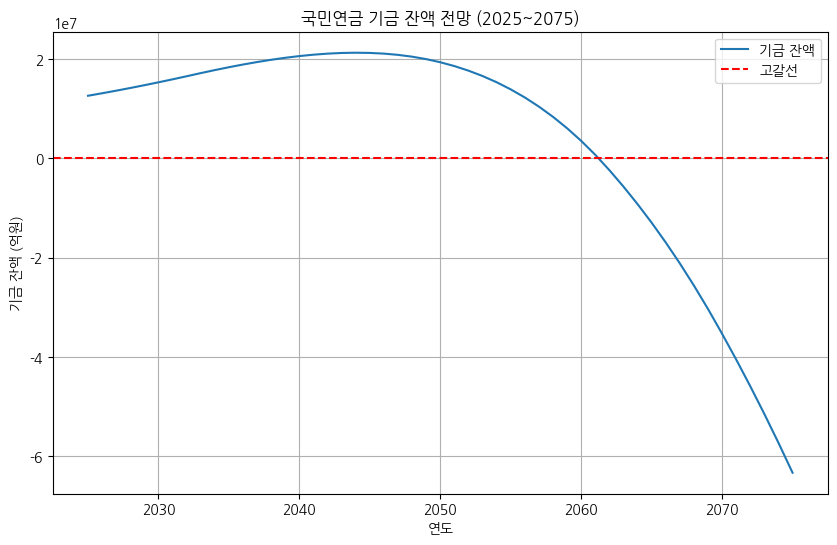

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 초기 기금 잔액 (2024년 말, 억 원 단위)
fund_balance = 12128513

# 시뮬레이션 연도
years = range(2025, 2076)

# 인구 가정 (단위: 명) - 선형 보간
def interpolate(year, start_year, end_year, start_val, end_val):
    return start_val + (end_val - start_val) * ((year - start_year) / (end_year - start_year))

# 보험료율 (2026~2033 인상, 이후 13%)
def get_premium_rate(year):
    if year <= 2025:
        return 0.09
    elif 2026 <= year <= 2033:
        return 0.09 + 0.005 * (year - 2025)
    else:
        return 0.13

# 소득대체율 (2026년부터 43%)
def get_replacement_rate(year):
    if year <= 2025:
        return 0.415 if year == 2025 else 0.42
    else:
        return 0.43

# 조정계수 (2024년 0.376 → 2070년 0.9)
def get_adjust_coeff(year):
    if year <= 2070:
        return 0.376 + (0.9 - 0.376) * (year - 2024) / (2070 - 2024)
    else:
        return 0.9

# 평균소득 성장률 가정
def get_wage_growth(year):
    if year <= 2030:
        return 0.035
    elif year <= 2040:
        return 0.030
    elif year <= 2050:
        return 0.025
    else:
        return 0.020

# 초기 평균소득 (2024년, 만원 단위)
avg_wage = 3753

# 결과 저장 리스트
results = []

for year in years:
    # 인구 추계
    work_pop = interpolate(year, 2024, 2070, 36327585, 21000000)
    elder_pop = interpolate(year, 2024, 2060, 9938235, 17000000)
    contrib_num = work_pop * 0.605   # 가입자 비율
    benef_num = elder_pop * 0.742    # 수급자 비율

    # 평균소득 갱신
    avg_wage *= (1 + get_wage_growth(year))

    # 보험료율, 소득대체율, 조정계수
    pr = get_premium_rate(year)
    rr = get_replacement_rate(year)
    adj = get_adjust_coeff(year)

    # 연금 수입 (억 원)
    income_contrib = avg_wage * contrib_num * pr * 0.80 / 10000.0

    # 연금 지출 (억 원)
    expense_pension = avg_wage * benef_num * rr * adj / 10000.0
    expense_admin = 0.02 * expense_pension
    total_expense = expense_pension + expense_admin

    # 기금 운용 수익
    income_return = fund_balance * 0.03 if fund_balance > 0 else 0

    # 기금 잔액 갱신
    fund_balance = fund_balance + income_contrib + income_return - total_expense

    results.append([year, income_contrib, total_expense, fund_balance])

# 결과 DataFrame
df_result = pd.DataFrame(results, columns=["연도","연금수입(억원)","연금지출(억원)","기금잔액(억원)"])
print(df_result.to_string(index=False))

# 그래프 시각화
plt.figure(figsize=(10,6))
plt.plot(df_result["연도"], df_result["기금잔액(억원)"], label="기금 잔액")
plt.axhline(0, color='red', linestyle='--', label="고갈선")
plt.title("국민연금 기금 잔액 전망 (2025~2075)")
plt.xlabel("연도"); plt.ylabel("기금 잔액 (억원)")
plt.legend(); plt.grid(True); plt.show()


#변수들 회귀식으로 예측

컬럼명 확인: ['합계출산율(명)', '기대수명(출생시 기대여명)', '고령인구(65세 이상)', '생산연령인구 (15-64세)', '국민연금 수급자 수 (명)', '국민연금 수급자 수급금액 (단위:백만원)', '국민연급 가입자 수 (명)', '국내총생산(실질성장률) (%)', '인플레이션율 (%)', '실업률 (%)', '정규직 평균 연봉(단위: 만원, 만)', '비정규직 평균 연봉(단위: 만원, 만)', '평균 연봉(단위: 만원, 만)', '정규직 근로자 수(단위: 만원, 만)', '비정규직 근로자 수(단위: 만원, 만)', '전체 근로자 수(단위: 만원, 만)', '기금 조성(수익총액), (단위:억원)\n ; 연금보험료+운용수익+국고보조금 등 기타', '연금보험료 (단위:억원)', '운용수익 (단위:억원)', '국고보조금 등 (단위:억원)', '기금 지출총액 (단위:억원)', '연금급여지급 (단위:억원)', '관리운영비 등 (단위:억원)', '기금 증가분 (단위:억원)', '기금 운용 (단위:억원)', '연도별 기금 운용 수익률', '보험료율 (%)', '소득대체율 (%)', '총 부양비', '노년 부양비', '연도별 소비자물가상승률(%)']

▶ 평균연봉 회귀식 (차수=1)
  f(x) = 83.789*x^1 + -165993.572
  연도  평균연봉 예측값
2025   3679.62
2026   3763.41
2027   3847.20
2028   3930.99
2029   4014.78
2030   4098.57
2031   4182.36
2032   4266.14
2033   4349.93
2034   4433.72
2035   4517.51
2036   4601.30
2037   4685.09
2038   4768.88
2039   4852.67
2040   4936.46
2041   5020.25
2042   5104.04
2043   5187.83
2044   5271.62
2045   5355.40
2046   5439.19
2047   

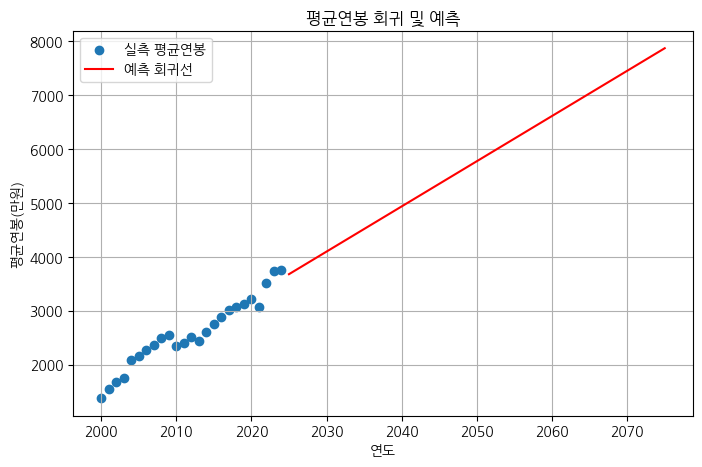

In [28]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CSV 불러오기
# 첫 번째 열을 인덱스로 읽어서 '연도'로 이름 붙여줌
df = pd.read_csv("통계최강자전.csv", encoding="utf-8-sig", index_col=0)
df.index.name = "연도"

# 컬럼명 확인
print("컬럼명 확인:", df.columns.tolist())
# 2. 필요한 열 추출 (쉼표 제거 후 숫자로 변환)
years = df.index.values.astype(int)

avg_wage = df["평균 연봉(단위: 만원, 만)"].astype(float).values

contributors = df["국민연급 가입자 수 (명)"].str.replace(",", "").astype(float).values
beneficiaries = df["국민연금 수급자 수 (명)"].str.replace(",", "").astype(float).values
contrib_income = df["연금보험료 (단위:억원)"].str.replace(",", "").astype(float).values
benefit_outgo = df["연금급여지급 (단위:억원)"].str.replace(",", "").astype(float).values



# 3. 회귀 적합 및 예측 함수 정의
def fit_and_predict(x, y, degree, name, start_year=2025, end_year=2075):
    coef = np.polyfit(x, y, degree)
    poly = np.poly1d(coef)

    # 회귀식 출력
    print(f"\n▶ {name} 회귀식 (차수={degree})")
    eqn = " + ".join(
        [f"{round(c,3)}*x^{deg}" if deg > 0 else f"{round(c,3)}"
         for deg, c in zip(range(degree, -1, -1), coef)]
    )
    print("  f(x) =", eqn)

    # 예측
    pred_years = np.arange(start_year, end_year+1)
    pred_values = poly(pred_years)
    result = pd.DataFrame({"연도": pred_years, f"{name} 예측값": np.round(pred_values, 2)})
    print(result.to_string(index=False))

    return poly, result

# 4. 각 변수별 회귀 적합 및 예측
poly_avg, pred_avg = fit_and_predict(years, avg_wage, 1, "평균연봉")            # 선형
poly_contrib, pred_contrib = fit_and_predict(years, contributors, 2, "가입자수") # 2차
poly_benef, pred_benef = fit_and_predict(years, beneficiaries, 2, "수급자수")   # 2차
poly_income, pred_income = fit_and_predict(years, contrib_income, 2, "연금보험료") # 2차
poly_outgo, pred_outgo = fit_and_predict(years, benefit_outgo, 3, "연금급여지급") # 3차

# 5. 시각화 (평균연봉 예시)
plt.figure(figsize=(8,5))
plt.scatter(years, avg_wage, label="실측 평균연봉")
plt.plot(pred_avg["연도"], pred_avg["평균연봉 예측값"], color="red", label="예측 회귀선")
plt.title("평균연봉 회귀 및 예측")
plt.xlabel("연도"); plt.ylabel("평균연봉(만원)")
plt.legend(); plt.grid(True); plt.show()

  연도    기금잔액(억 원)  기금잔액(조 원)
2025   12660923.0    1266.09
2026   13188403.0    1318.84
2027   13707001.0    1370.70
2028   14212425.0    1421.24
2029   14700028.0    1470.00
2030   15164801.0    1516.48
2031   15601360.0    1560.14
2032   16003935.0    1600.39
2033   16366358.0    1636.64
2034   16682054.0    1668.21
2035   16944024.0    1694.40
2036   17144836.0    1714.48
2037   17276611.0    1727.66
2038   17331009.0    1733.10
2039   17299216.0    1729.92
2040   17171928.0    1717.19
2041   16939341.0    1693.93
2042   16591128.0    1659.11
2043   16116431.0    1611.64
2044   15503843.0    1550.38
2045   14741387.0    1474.14
2046   13816505.0    1381.65
2047   12716038.0    1271.60
2048   11426208.0    1142.62
2049    9932598.0     993.26
2050    8220135.0     822.01
2051    6273071.0     627.31
2052    4074959.0     407.50
2053    1608636.0     160.86
2054   -1143800.0    -114.38
2055   -4166699.0    -416.67
2056   -7422107.0    -742.21
2057  -10920553.0   -1092.06
2058  -1467278

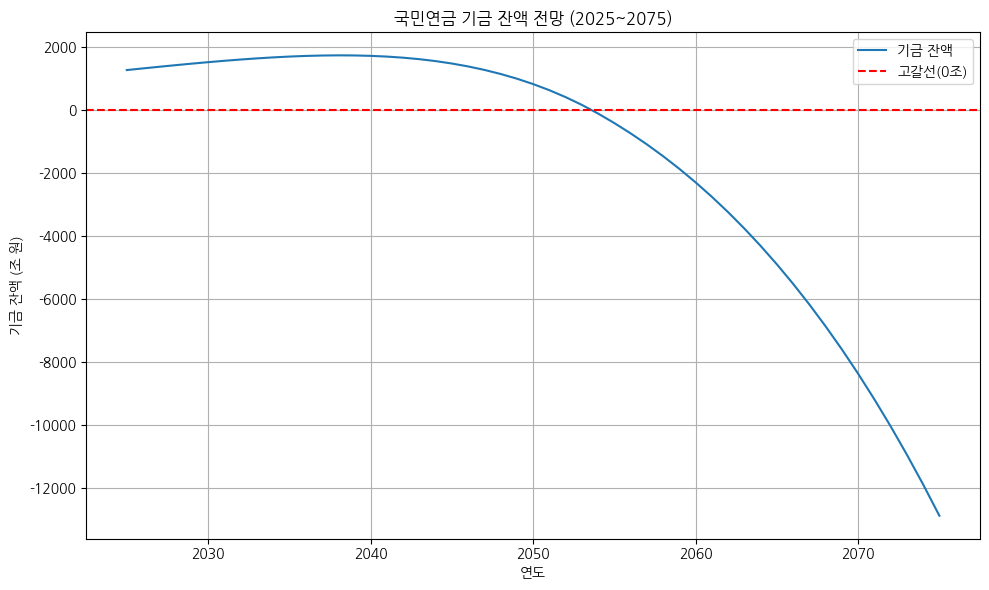

In [29]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. CSV 불러오기
df = pd.read_csv("통계최강자전.csv", encoding="utf-8-sig", index_col=0)
df.index.name = "연도"

# 2. 필요한 열 추출 (쉼표 제거 후 숫자 변환)
years = df.index.values.astype(int)
avg_wage = df["평균 연봉(단위: 만원, 만)"].astype(float).values
contributors = df["국민연급 가입자 수 (명)"].str.replace(",", "").astype(float).values
beneficiaries = df["국민연금 수급자 수 (명)"].str.replace(",", "").astype(float).values
contrib_income = df["연금보험료 (단위:억원)"].str.replace(",", "").astype(float).values
benefit_outgo = df["연금급여지급 (단위:억원)"].str.replace(",", "").astype(float).values

# 3. 회귀 적합 함수
def fit_and_predict(x, y, degree, name, start_year=2025, end_year=2075):
    coef = np.polyfit(x, y, degree)
    poly = np.poly1d(coef)
    pred_years = np.arange(start_year, end_year+1)
    pred_values = poly(pred_years)
    return poly, pred_years, pred_values

# 4. 각 변수별 회귀 적합
poly_avg, pred_years, pred_avg = fit_and_predict(years, avg_wage, 1, "평균연봉")
poly_contrib, _, pred_contributors = fit_and_predict(years, contributors, 2, "가입자수")
poly_benef, _, pred_beneficiaries = fit_and_predict(years, beneficiaries, 2, "수급자수")
poly_income, _, pred_income = fit_and_predict(years, contrib_income, 2, "연금보험료")
poly_outgo, _, pred_outgo = fit_and_predict(years, benefit_outgo, 3, "연금급여지급")

# 5. 기금 잔액 시뮬레이션
fund_balance = 12128513  # 2024년말 기금 잔액 (억원)
funds = []

for i, year in enumerate(pred_years):
    income = pred_income[i]                   # 회귀 기반 보험료 수입 (억원)
    outgo = pred_outgo[i]                     # 회귀 기반 급여 지출 (억원)
    admin = 0.02 * outgo                      # 관리비 = 급여지출의 2%
    invest = fund_balance * 0.03 if fund_balance > 0 else 0  # 운용수익
    fund_balance = fund_balance + income + invest - (outgo + admin)
    funds.append(fund_balance)

# 6. DataFrame 정리
df_fund = pd.DataFrame({
    "연도": pred_years,
    "기금잔액(억 원)": np.round(funds, 0),
    "기금잔액(조 원)": np.round(np.array(funds)/10000, 2)  # 억→조
})
print(df_fund.to_string(index=False))

# 7. 시각화 (잔여량, 조 단위)
plt.figure(figsize=(10,6))
plt.plot(df_fund["연도"], df_fund["기금잔액(조 원)"], label="기금 잔액")
plt.axhline(0, color="red", linestyle="--", label="고갈선(0조)")
plt.title("국민연금 기금 잔액 전망 (2025~2075)")
plt.xlabel("연도"); plt.ylabel("기금 잔액 (조 원)")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


In [31]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

# 1. CSV 파일 불러오기
df = pd.read_csv("통계최강자전.csv", encoding="utf-8-sig", index_col=0)
df.index.name = "연도"

# 2. 필요한 컬럼만 추출
df_extract = df[[
    "평균 연봉(단위: 만원, 만)",
    "국민연급 가입자 수 (명)",
    "국민연금 수급자 수 (명)",
    "연금보험료 (단위:억원)",
    "연금급여지급 (단위:억원)"
]].copy()

# 3. 쉼표 제거 후 숫자 변환
for col in ["국민연급 가입자 수 (명)", "국민연금 수급자 수 (명)", "연금보험료 (단위:억원)", "연금급여지급 (단위:억원)"]:
    df_extract[col] = df_extract[col].astype(str).str.replace(",", "").astype(float)

df_extract["평균 연봉(단위: 만원, 만)"] = df_extract["평균 연봉(단위: 만원, 만)"].astype(float)

# 4. 회귀모델로 2025~2075 예측
def fit_and_predict(x, y, degree, start_year=2025, end_year=2075):
    coef = np.polyfit(x, y, degree)
    poly = np.poly1d(coef)
    pred_years = np.arange(start_year, end_year+1)
    pred_values = poly(pred_years)
    return pd.Series(pred_values, index=pred_years)

years = df_extract.index.values.astype(int)

# 변수별 회귀 (차수는 앞서 설정한 것과 동일하게 적용)
pred_avg   = fit_and_predict(years, df_extract["평균 연봉(단위: 만원, 만)"], 1)
pred_contr = fit_and_predict(years, df_extract["국민연급 가입자 수 (명)"], 2)
pred_benef = fit_and_predict(years, df_extract["국민연금 수급자 수 (명)"], 2)
pred_inc   = fit_and_predict(years, df_extract["연금보험료 (단위:억원)"], 2)
pred_outgo = fit_and_predict(years, df_extract["연금급여지급 (단위:억원)"], 3)

# 5. 예측값 DataFrame으로 정리
df_pred = pd.DataFrame({
    "평균 연봉(단위: 만원, 만)": pred_avg.round(2),
    "국민연급 가입자 수 (명)": pred_contr.round(0),
    "국민연금 수급자 수 (명)": pred_benef.round(0),
    "연금보험료 (단위:억원)": pred_inc.round(0),
    "연금급여지급 (단위:억원)": pred_outgo.round(0)
})

# 6. 실제+예측 데이터 합치기
df_final = pd.concat([df_extract, df_pred])

# 7. 엑셀 저장
output_file = "국민연금_실측+예측(2000~2075).xlsx"
df_final.to_excel(output_file, sheet_name="실측+예측")  # encoding 제거

print(f"엑셀 파일 저장 완료: {output_file}")


엑셀 파일 저장 완료: 국민연금_실측+예측(2000~2075).xlsx
